In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:

# Pre-Processing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Model relavant libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from keras.optimizers import Adam
from keras.regularizers import l2


In [4]:
train0 = pd.read_csv('/content/train.csv')
train = train0.copy()

train.head(3)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [9]:
test0 = pd.read_csv('/content/test.csv')
test = test0.copy()

test.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997


In [10]:

# train + test data all together
df0 = pd.concat([train,test], sort=False).reset_index(drop=True)
df = df0.copy()

df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [11]:

print('Train Data Shape:', train.shape)
print('Test Data Shape:', test.shape)


Train Data Shape: (57290, 28)
Test Data Shape: (50000, 27)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57290 entries, 0 to 57289
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        57290 non-null  object 
 1   Customer_ID               57290 non-null  object 
 2   Month                     57290 non-null  object 
 3   Name                      51586 non-null  object 
 4   Age                       57290 non-null  object 
 5   SSN                       57290 non-null  object 
 6   Occupation                57290 non-null  object 
 7   Annual_Income             57290 non-null  object 
 8   Monthly_Inhand_Salary     48679 non-null  float64
 9   Num_Bank_Accounts         57290 non-null  int64  
 10  Num_Credit_Card           57290 non-null  int64  
 11  Interest_Rate             57290 non-null  int64  
 12  Num_of_Loan               57290 non-null  object 
 13  Type_of_Loan              50794 non-null  object 
 14  Delay_

In [12]:

print(f'Data shape (rows, columns): {df.shape}')
print(f'Number of total duplicate rows: {df.duplicated().sum()}')
print(f'Number of missing values in Train: {train.isnull().sum().sum()}')
print(f'Number of missing values in Test: {test.isnull().sum().sum()}')


Data shape (rows, columns): (107290, 28)
Number of total duplicate rows: 0
Number of missing values in Train: 34318
Number of missing values in Test: 30053


In [13]:
# =============== User-Defined-Function ==========================

#======= Get count and percentage of values for each column ======
def get_value_count(df, column_name):
    """
    This function calculates and returns a DataFrame with the value counts and
    their corresponding percentages for a specified column in the DataFrame.
    """

    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='percent')
    vc_norm['percent'] = (vc_norm['percent'] * 100).map('{:.2f}%'.format)

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['percent']], axis=1)

    return df_result



# ========== User-Defined-Function for Missing Values ============
def missing_values(df):
    """This function calculates the missing values count and their percentage in a DataFrame."""

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)

    # Format the percentage as '0.00%' with % symbol
    missing_percentage_formatted = missing_percentage.map("{:.2f}%".format)
    # Create a DataFrame to store the results
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage_formatted})

    return missing_df

    # ============= Compare Missing Values (Train-Test ==============
def compare_missing_values(train, test):
    """
    Compares missing values between train and test datasets, returning counts, percentages, and data types.
    """
    def missing_data(df, label):
        missing_count = df.isna().sum()[df.isna().sum() > 0]
        total_count = len(df)
        missing_percentage = (missing_count / total_count * 100).map("{:.2f}%".format)
        return pd.DataFrame({
            f'{label} Missing Values': missing_count,
            f'{label} Missing Percentage': missing_percentage,
            f'{label} dtypes': df.dtypes[missing_count.index]
        })

    # Get missing data for train and test
    train_missing_df = missing_data(train, 'Train')
    test_missing_df = missing_data(test, 'Test')

    # Concatenate the missing values side by side
    return pd.concat([train_missing_df, test_missing_df], axis=1)


# ========== Plotting Missing Values  ===========================
def na_ratio_plot(df):
    """Plots the ratio of missing values for each feature and prints the count of missing values."""

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

    print(df.isna().sum()[df.isna().sum()>0])

    #========== Detecting Non-Numerical Characters ===========================

import re

def find_non_numeric_values(df, column_name):
    """
    Finds unique non-numeric values in a specified column of the DataFrame.
    """
    pattern = r'\D+'  # Pattern to match non-numeric characters
    # Find and flatten non-numeric values, then ensure uniqueness with set
    return set(re.findall(pattern, ' '.join(df[column_name].astype(str))))



In [14]:

# Comparing missing values in Train and Test data
compare_missing_values(train, test)

,Train Missing Values,Train Missing Percentage,Train dtypes,Test Missing Values,Test Missing Percentage,Test dtypes
Name,5704,9.96%,object,5015.000,10.03%,object
Monthly_Inhand_Salary,8611,15.03%,float64,7498.000,15.00%,float64
Type_of_Loan,6496,11.34%,object,5704.000,11.41%,object
Num_of_Delayed_Payment,3975,6.94%,object,3498.000,7.00%,object
Num_Credit_Inquiries,1089,1.90%,float64,1035.000,2.07%,float64
Credit_History_Age,5196,9.07%,object,4470.000,8.94%,object
Amount_invested_monthly,2531,4.42%,object,2271.000,4.54%,object
Payment_Behaviour,1,0.00%,object,NaN,NaN,NaN
Monthly_Balance,714,1.25%,object,562.000,1.12%,object
Credit_Score,1,0.00%,object,NaN,NaN,NaN


<Axes: >

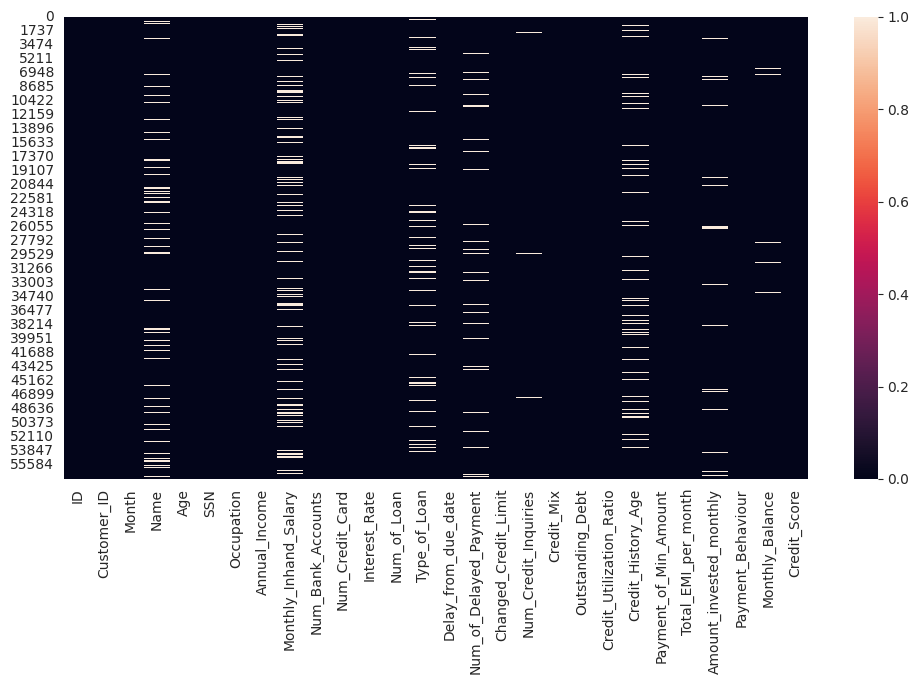

In [15]:
# TRAIN DATASET
sns.heatmap(train.isnull())

<Axes: >

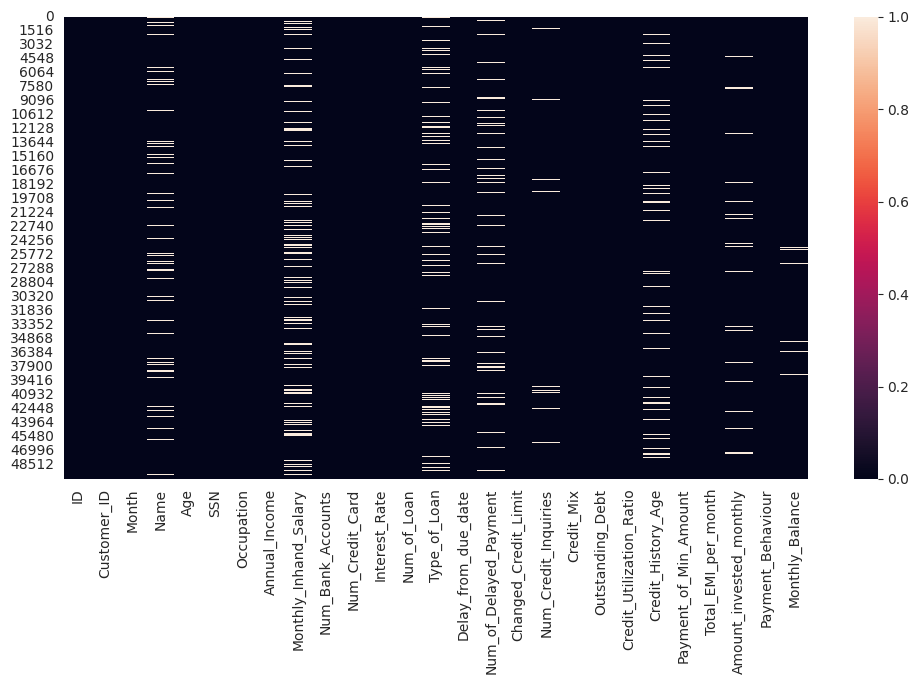

In [16]:

# TEST DATASET
sns.heatmap(test.isnull())

In [17]:
# Name column unique values and percentage
get_value_count(df, 'Name')


,Name,counts,percent
0,Nate Raymondw,53,0.05%
1,Stevex,52,0.05%
2,Langep,51,0.05%
3,Raymondr,50,0.05%
4,Danielz,48,0.05%
...,...,...,...
10134,Steven C.k,1,0.00%
10135,Holdend,1,0.00%
10136,Sarah N.y,1,0.00%
10137,Kentaro Sugiyamaj,1,0.00%


In [18]:

# column unique values and percentage
get_value_count(train, 'Annual_Income')


,Annual_Income,counts,percent
0,109945.32,14,0.02%
1,40341.16,14,0.02%
2,19114.12,8,0.01%
3,52032.16,8,0.01%
4,70383.0,8,0.01%
...,...,...,...
10841,16808.35_,1,0.00%
10842,55229.64_,1,0.00%
10843,33492.57_,1,0.00%
10844,7020.545_,1,0.00%


In [19]:

# Check missing values and dtype

print('Remaining missing values in Train:', train['Annual_Income'].isna().sum())
print('Remaining missing values in Test:', test['Annual_Income'].isna().sum())
print('dtype: ', train['Monthly_Inhand_Salary'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Annual_Income')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


{' ', '.', '_ '}

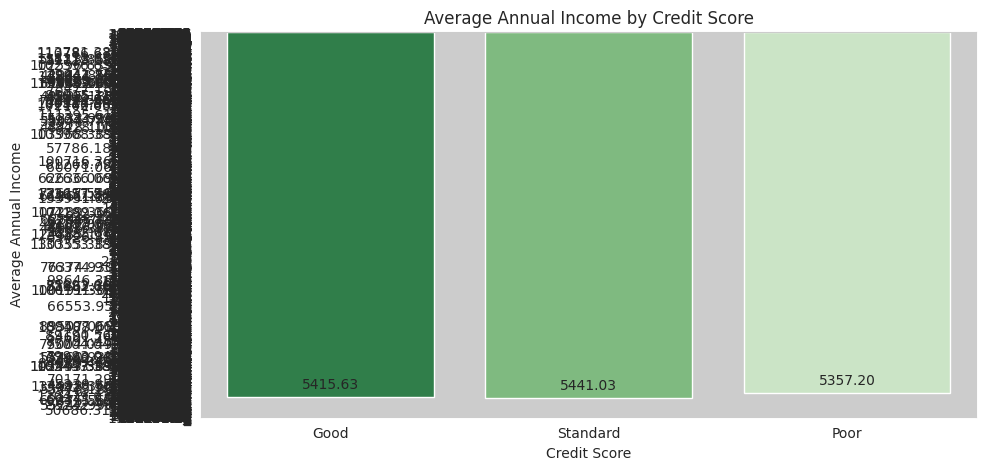

In [21]:
# Plot Average Annual Income by Credit Score

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Annual_Income', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches: ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

plt.title('Average Annual Income by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Annual Income')

plt.show()

In [22]:

# TEST DATA
# For each of the most common loan types (excluding the first one) in the test dataset
for i in test['Type_of_Loan'].value_counts().head(9).index[1:]:

    # Create a new column for each loan type in the test dataset
    # The new column will be 1 if the loan type is present in 'Type_of_Loan', 0 otherwise
    test[i] = test['Type_of_Loan'].str.contains(i, na=False).astype(int)

# Delete the original 'Type_of_Loan' column after creating binary columns in the test dataset
del test['Type_of_Loan']

# Display the first few rows of the modified test dataframe
test.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour,Monthly_Balance,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Low_spent_Small_value_payments,186.26670208571772,1,1,0,0,0,0,1,1
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,High_spent_Medium_value_payments,361.44400385378196,1,1,0,0,0,0,1,1
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,Low_spent_Medium_value_payments,264.67544623342997,1,1,0,0,0,0,1,1


In [23]:
# Check the column' unique values and percentage
get_value_count(train, 'Num_of_Delayed_Payment')

,Num_of_Delayed_Payment,counts,percent
0,19,3037,5.70%
1,16,3026,5.68%
2,17,3019,5.66%
3,15,2965,5.56%
4,18,2944,5.52%
...,...,...,...
437,531,1,0.00%
438,4023,1,0.00%
439,3870,1,0.00%
440,4022,1,0.00%


In [24]:
# Check the column' unique values and percentage
get_value_count(train, 'Credit_History_Age')

,Credit_History_Age,counts,percent
0,19 Years and 4 Months,256,0.49%
1,19 Years and 5 Months,253,0.49%
2,19 Years and 3 Months,250,0.48%
3,18 Years and 4 Months,250,0.48%
4,15 Years and 11 Months,247,0.47%
...,...,...,...
399,0 Years and 3 Months,14,0.03%
400,0 Years and 2 Months,10,0.02%
401,33 Years and 7 Months,8,0.02%
402,33 Years and 8 Months,6,0.01%


In [25]:

# Check the column' unique values and percentage
get_value_count(train, 'Age')

,Age,counts,percent
0,31,1697,2.96%
1,32,1670,2.91%
2,26,1669,2.91%
3,28,1618,2.82%
4,36,1602,2.80%
...,...,...,...
1092,4959,1,0.00%
1093,3834_,1,0.00%
1094,7295,1,0.00%
1095,3345,1,0.00%
